# Primer Parcial 2019

In [25]:
import numpy as np
import pandas as pd

# **Exercici 1**

### Sistemes de Recomanació

**Creació de les dades**

Crea un dataframe amb les dades que es mostren a continuació, incloent els nom de files i columnes.

Les dades indiquen el nombre de reproduccions de pel·lícules per a diferents usuaris.

<img src='dades.png' />

In [37]:
# Implementa (anomena "df" a la variable que conté el DataFrame):
df = pd.DataFrame.from_dict({'Alex' : {'Avengers':4, 'Star Wars':2.0, 'Thor':np.nan, 'Spider-man':5.0,"Iron man":4},
                            'Bob' : {'Avengers':5, 'Star Wars':3.0, 'Thor':4.0, 'Spider-man':np.nan,"Iron man":3},
                            'Tom' : {'Avengers':3, 'Star Wars':np.nan, 'Thor':4.0, 'Spider-man':4.0,"Iron man":3}}, orient='index')
df

,Avengers,Star Wars,Thor,Spider-man,Iron man
Alex,4,2.0,NaN,5.0,4
Bob,5,3.0,4.0,NaN,3
Tom,3,NaN,4.0,4.0,3


Per tal de poder recomanar és imprescindible definir una funció de similitud entre vectors. 

Siguin $x$ i $y$ dos vectors, implementa les següents funcions de similitud:

1) **Correlació de Pearson**:

$${\displaystyle sim(x,y)={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}} \in [-1,1] \\ \text{On }\bar{x} = \frac{1}{n} \sum^n_i x_i\text{ la mitja (i anàlogament per }y\text{)}$$

2) **Similitud cosinus**: 

$$sim(x, y) = \frac{x\cdot y}{||x||\hspace{0.1cm} ||y||} \in [-1,1]  \\ \text{On }||x||\text{ indica la norma de }x\text{ (i anàlogament per }y\text{)}$$

Notes:

- **Recorda que no pots fer servir bucles ni funcions que retornin directament el resultat**.

- Les dues mètriques no tenen perquè donar el mateix valor pels mateixos vector.

- Pots considerar que no hi ha NaNs en els vectors, han estat substituïts per 0s.

In [61]:
def pearson(x,y):
    """
    Retorna la correlació de Pearson de dos vectors n-dimensionals.
    Pels casos on el divisor sigui 0, retorna 0.
    
    :param x: Primer vector
    :param y: Segon vector
    :return : Escalar (float) corresponent a la correlació de Pearson
    """
    _x = np.mean(x)
    _y = np.mean(y)
    n = len(x)
    num = np.sum((x -_x)*(y - _y))
    d_1 = np.sqrt(np.sum((x -_x)**2))
    d_2 = np.sqrt(np.sum((y -_y)**2))
    denom = d_1 * d_2
    if denom != 0: return num/denom
    else: return 0

In [62]:
def cosine(x,y):
    """
    Retorna la similitud cosinus de dos vectors n-dimensionals.
    Pels casos on el divisor sigui 0, retorna 0.
    
    :param x: Primer vector
    :param y: Segon vector
    :return : Escalar (float) corresponent a la similitud cosinus
    """
    num = x.dot(y)
    norm_x = np.sqrt(np.sum(x**2))
    norm_y = np.sqrt(np.sum(y**2))
    denom = norm_x * norm_y
    if denom != 0: return num/denom
    else: return 0

In [63]:
x = np.array([1, 1, 1, 0., 2])
y = np.array([1, 2, 3, 0., 0.])
print(pearson(x, y))
print(cosine(x, y))

0.0
0.6060915267313265


Els usuaris reprodueixen en diferent mesura els items, uns més cops, d'altres menys. Fent servir la següent formula, heu d'escalar la predicció a la mitja de l'usuari.

La predicció d'un item $i$ per a un usuari $u$ vindrà donada per:

$$pred(u, i) = \hat{r}_{u,i} = \bar{r_u} + \frac{\sum_{p\neq u,r_{p,i}>0} sim(u, p)\cdot (r_{p,i}-\bar{r_p})}{\sum_{p\neq u,r_{p,i}>0} sim(u, p)}$$
on $r_{p,i}$ són les reproduccions de l'usuari $p$ per la pel·lícula $i$, $\bar{r_u}$ és la mitjana de reproduccions de l'usuari $u$ i, similarment, $\bar{r_p}$ la mitja de reproduccions de l'usuari $p$.

Recordeu que únicament heu de tenir en compte les similituds d'aquells usuaris que hagin reproduït les pel·lícules. Implementeu-ho sense bucles.

In [180]:
a = df.values
a[1]

array([ 5.,  3.,  4., nan,  3.])

In [222]:
def prediction(user, item, df, similarities):
    """
    Utilitzant les similituds i el nombre de vegades que un usuari ha reproduït un ítem
    calcula segons la fórmula anterior el valor de recomanació
    
    No és necessari que consideris una matriu triangular.
    No facis servir bucles.
    
    Si ho necessites, pots fer conversions d'ID a fila/columna amb
    df.index.get_loc(id) i df.columns.get_loc(id)
    
    :param user: ID de l'usuari per la predicció
    :param item: ID de l'ítem per la predicció
    :param df: Dataframe que conté el nombre de vegades que un usuari 
        ha reproduït una pel·lícula
    :param similarities: Matriu de similituds
    :return : Retorna un escalar (float) amb la predicció
    """
    array_data = df.values 
    array_data = np.where(np.isnan(array_data),0,array_data)
    user_index = df.index.get_loc(user) 
    _ru = np.mean(array_data[user_index])
    users_p = np.delete(array_data,array_data[user_index])
    np.sum(similarities[user,users_p]*array_data[users_p])
    #No m'ha donat temps a acabar l'algorísme
    print(array_data[user])

Aquesta matriu de similitud **no** correspon amb les dades intencionadament. Feu-la servir per al següent exercici.

In [223]:
similarities = np.array([[0.        , 0.37510523 , 0.42534257],
                         [0.37510523, 0.        , 0.86862112],
                         [0.42534257, 0.86862112, 0.        ]])

In [224]:
prediction('Bob', 'Star Wars', df, similarities)

C:\Users\UB\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Exercici 2

### Optimització

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from plot_utils import *

A les pràctiques hem vist com arribar al mínim d'una funció. Ara el que volem es poder trobar mínims o màxims amb el mateix procés iteratiu.

Per resoldre aquest problema considerarem la direcció de cerca donada pel **mètode de Newton**.

En aquest exercici es demana que implementeu aquest mètode.
La modificació que caldrà fer respecte a l'algorisme del descens del gradient vist a classe (en una dimensió) ve donat per l'equació iterativa:

$$x^{k+1} = x^{k}-\alpha^{k} \frac{\partial f(x^{k})}{\partial^2 f(x^{k})}$$

Que caldrà repetir fins a arribar a un màxim d'iteracions o fins que $|x^{k+1} - x^{k}|< eps$.

Per tal de comprovar la correcta implementació del mètode de Newton es donen les funcions $f_1$ i $f_2$ i les seves derivades.

$$f_1(x) = x^2$$

$$ \frac{\partial f_1}{\partial x} = 2x $$

$$ \partial^2 f_1(x) = \frac{\partial^2 f_1}{\partial x} = 2$$

In [5]:
def f1 (x):
    return x**2

def df1(x):
    return x*2

def d2f1(x):
    return 2

$$f_2(x) = x^3 - 2x + 2$$

$$ \frac{\partial f_2}{\partial x} = 3x^2 -2$$

$$ \partial^2 f_2(x) = \frac{\partial^2 f_2}{\partial x} = 6x$$

In [6]:
def f2 ( x ):
    return x**3 - 2*x + 2 

def df2(x):
    return 3*x**2 - 2

def d2f2(x):
    return 6*x

In [15]:
def gradient_descend_Newton(grad, grad_2, x, alpha, eps=1e-6, max_iters=1e2):
    """
    Aquesta funció implementa l'algorisme de Newton, 
    és a dir, donat un punt inicial, el gradient, la segona derivada i el pas, intenta 
    trobar el mínim o màxim de la funció seguint l'equació iterativa anterior.
    
    :param grad: Primera derivada de la funció
    :param grad_2: Segona derivada de la funció
    :param x: Punt inicial
    :param alpha: Pas de cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array, amb shape [X], que contingui el punt inicial més els punts on s'ha mogut a cada iteració. 
            X és el nombre d'iteracions fetes + 1
        * Punt final, mínim o màxim trobat
    """
    aux = [x]
    for i in range(int(max_iters)):
        div_grad = grad(x)/grad_2(x)
        next_x = x - alpha * div_grad
        if np.abs(next_x - x) < eps:
            break
        aux.append(next_x)
        x = next_x
    return (np.asarray(aux), aux[-1])

f1(0.0) = 0.0


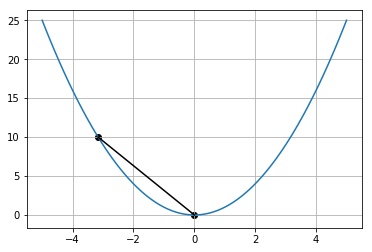

In [22]:
# Plot
X = np.arange(-5, 5.01, 0.1)
x0 = np.random.uniform(-4, 4)
points, final_point = gradient_descend_Newton(df1, d2f1, x0, 1)
fig = plt.figure()
plot_gradient_descend_1d(f1, X, points, final_point, fig)

print('f1({}) = {}'.format(final_point, f1(final_point)))

f2(-0.8164965813292349) = 3.0886621079036347


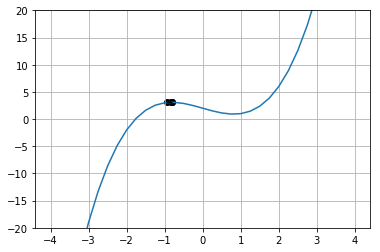

In [21]:
# Plot
X = np.arange(-4, 4.01, 0.25)
x0 = np.random.uniform(-4, 4)
points, final_point = gradient_descend_Newton(df2, d2f2, x0, 1)
fig = plt.figure()
plot_gradient_descend_1d(f2, X, points, final_point, fig)
fig.gca().set_ylim([-20, 20])

print('f2({}) = {}'.format(final_point, f2(final_point)))